In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
import joblib

In [2]:
diamonds = pd.read_csv('diamonds_preprocessed.csv')
diamondsOG = pd.read_csv('diamonds_original.csv')

In [3]:
diamonds

,carat,clarity,color,cut,depth,table,x,y,z,class,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,"(5000, 10000]",0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,"[0, 5000]",0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,"[0, 5000]",0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,"(5000, 10000]",0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,"[0, 5000]",0.066582
...,...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,"[0, 5000]",0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,"[0, 5000]",0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,"[0, 5000]",0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,"[0, 5000]",0.080874


In [4]:
diamondsOG

,carat,clarity,color,cut,depth,table,x,y,z,price
0,1.26,2,4,2,60.6,60.0,6.97,7.00,4.23,6546.0
1,0.80,3,4,4,62.1,54.0,5.96,5.99,3.71,3030.0
2,0.56,4,2,4,61.7,54.0,5.28,5.32,3.27,1915.0
3,1.51,3,6,1,64.0,58.0,7.24,7.27,4.64,6936.0
4,0.33,6,5,4,62.2,54.0,4.43,4.45,2.76,646.0
...,...,...,...,...,...,...,...,...,...,...
53935,1.02,2,4,2,62.9,59.0,6.38,6.41,4.02,4796.0
53936,0.93,2,4,3,61.8,59.0,6.27,6.23,3.86,3750.0
53937,0.30,4,5,4,62.4,54.0,4.30,4.32,2.69,491.0
53938,0.36,3,2,4,61.5,55.0,4.60,4.57,2.82,807.0


In [5]:
price_classes = ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
feature_names = diamonds.columns.to_list()
feature_names.remove('class')
feature_names

['carat', 'clarity', 'color', 'cut', 'depth', 'table', 'x', 'y', 'z', 'volume']

In [6]:
X = diamonds[feature_names]
y = diamonds['class']

In [7]:
X

,carat,clarity,color,cut,depth,table,x,y,z,volume
0,1.26,2,4,2,0.364706,0.72,0.661224,0.680328,0.716180,0.512314
1,0.80,3,4,4,0.541176,0.24,0.455102,0.473361,0.578249,0.295469
2,0.56,4,2,4,0.494118,0.24,0.316327,0.336066,0.461538,0.176404
3,1.51,3,6,1,0.764706,0.56,0.716326,0.735656,0.824934,0.623309
4,0.33,6,5,4,0.552941,0.24,0.142857,0.157787,0.326260,0.066582
...,...,...,...,...,...,...,...,...,...,...
52325,1.02,2,4,2,0.635294,0.64,0.540816,0.559426,0.660477,0.389186
52326,0.93,2,4,3,0.505882,0.64,0.518367,0.522541,0.618037,0.349234
52327,0.30,4,5,4,0.576471,0.24,0.116327,0.131148,0.307692,0.053560
52328,0.36,3,2,4,0.470588,0.32,0.177551,0.182377,0.342175,0.080874


In [8]:
y

0        (5000, 10000]
1            [0, 5000]
2            [0, 5000]
3        (5000, 10000]
4            [0, 5000]
             ...      
52325        [0, 5000]
52326        [0, 5000]
52327        [0, 5000]
52328        [0, 5000]
52329        [0, 5000]
Name: class, Length: 52330, dtype: object

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
all_predictions = []
accuracy_scores = []

***

Pomocne funkcije za izvestaj o modelu

In [10]:
def plot_predicted_probabilities(pipeline, X_test):
    probabilities = pipeline.predict_proba(X_test)
    classes = model.classes_

    fig, ax = plt.subplots()
    ax.bar(classes, np.max(probabilities, axis=0), color='#006400')
    ax.grid(alpha=0.5)
    ax.set_xlabel('Class')
    ax.set_ylabel('Probability')
    ax.set_xticks(classes)
    plt.show()

def model_report(pipeline, X_test, y_test):
  y_pred = pipeline.predict(X_test)
  model = pipeline['model']
  accuracy = accuracy_score(y_test, y_pred)
  all_predictions.append(y_pred)
  accuracy_scores.append(accuracy)

  print(f'Izvestaj o {type(model).__name__} modelu:')
  print('-------------------------------------------------------------------')
  print(f'Klase za predvidjanje: {price_classes}')
  print(f'Accuracy: {accuracy}')
  print('-------------------------------------------------------------------')
  print('Klasifikacioni izvestaj: ')
  print(classification_report(y_test, y_pred))
  print('-------------------------------------------------------------------')
  print('Matrica konfuzije: ')
  data = confusion_matrix(y_test, y_pred)
  _ = sns.heatmap(data, annot=True, fmt='g', xticklabels=model.classes_, yticklabels=model.classes_, cmap = plt.cm.Reds)



## SVC

In [11]:
class_percentages = [73.2, 17.7, 6.4, 2.6]
class_weights = {}
for i in range(4):
  class_weights[price_classes[i]] = (100 / class_percentages[i])

class_weights

{'[0, 5000]': 1.366120218579235,
 '(5000, 10000]': 5.649717514124294,
 '(10000, 15000]': 15.625,
 '15000+': 38.46153846153846}

In [12]:
svc = Pipeline([
    ('model', SVC(class_weight=class_weights, random_state=42))
])

In [13]:
svc.fit(X_train, y_train)

Pipeline(steps=[('model',
                 SVC(class_weight={'(10000, 15000]': 15.625,
                                   '(5000, 10000]': 5.649717514124294,
                                   '15000+': 38.46153846153846,
                                   '[0, 5000]': 1.366120218579235},
                     random_state=42))])

Izvestaj o SVC modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9357920886680681
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.79      0.82      0.80      1018
 (5000, 10000]       0.81      0.92      0.86      2802
        15000+       0.72      0.96      0.82       409
     [0, 5000]       1.00      0.95      0.97     11470

      accuracy                           0.94     15699
     macro avg       0.83      0.91      0.86     15699
  weighted avg       0.94      0.94      0.94     15699

-------------------------------------------------------------------
Matrica konfuzije: 


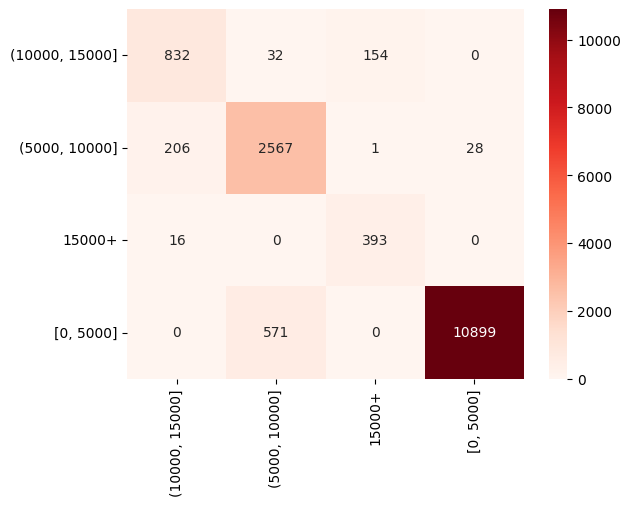

In [14]:
model_report(svc, X_test, y_test)

#### Hyperparameter tuning

In [15]:
params = {
    'model__kernel' : ['linear', 'rbf'],
}

In [16]:
grid = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=3, verbose=4)

In [17]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END ..............model__kernel=linear;, score=0.914 total time=   8.3s
[CV 2/3] END ..............model__kernel=linear;, score=0.914 total time=   8.4s
[CV 3/3] END ..............model__kernel=linear;, score=0.913 total time=   8.5s
[CV 1/3] END .................model__kernel=rbf;, score=0.933 total time=   9.8s
[CV 2/3] END .................model__kernel=rbf;, score=0.934 total time=   9.3s
[CV 3/3] END .................model__kernel=rbf;, score=0.931 total time=   9.8s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model',
                                        SVC(class_weight={'(10000, 15000]': 15.625,
                                                          '(5000, 10000]': 5.649717514124294,
                                                          '15000+': 38.46153846153846,
                                                          '[0, 5000]': 1.366120218579235},
                                            random_state=42))]),
             param_grid={'model__kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=4)

In [18]:
grid.best_params_

{'model__kernel': 'rbf'}

In [19]:
svc_cv = grid.best_estimator_

Izvestaj o SVC modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9357920886680681
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.79      0.82      0.80      1018
 (5000, 10000]       0.81      0.92      0.86      2802
        15000+       0.72      0.96      0.82       409
     [0, 5000]       1.00      0.95      0.97     11470

      accuracy                           0.94     15699
     macro avg       0.83      0.91      0.86     15699
  weighted avg       0.94      0.94      0.94     15699

-------------------------------------------------------------------
Matrica konfuzije: 


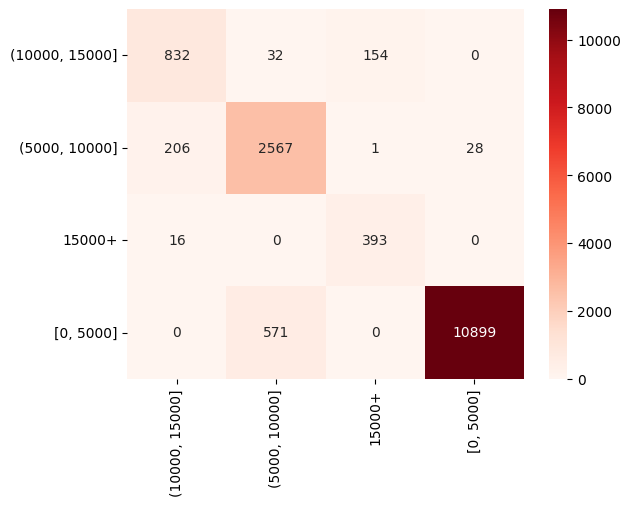

In [20]:
model_report(svc_cv, X_test, y_test)

***

### Now with PCA

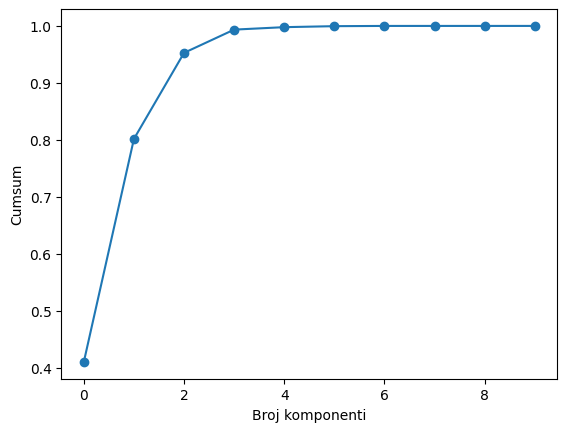

In [21]:
pca = PCA()

X_train_pca = pca.fit_transform(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Broj komponenti')
plt.ylabel('Cumsum')
plt.show()

In [22]:
svc_pca = Pipeline([
    ('pca', PCA()),
    ('model', SVC(class_weight=class_weights, random_state=42) )
])

In [23]:
params = {
    'pca__n_components' : [2, 3, 4],
    'model__kernel' : ['linear', 'rbf'],
}

In [24]:
grid = GridSearchCV(svc_pca, param_grid=params, scoring='accuracy', cv=3, verbose=4)

In [25]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END model__kernel=linear, pca__n_components=2;, score=0.457 total time= 1.5min
[CV 2/3] END model__kernel=linear, pca__n_components=2;, score=0.455 total time= 1.4min
[CV 3/3] END model__kernel=linear, pca__n_components=2;, score=0.458 total time= 1.5min
[CV 1/3] END model__kernel=linear, pca__n_components=3;, score=0.455 total time= 1.5min
[CV 2/3] END model__kernel=linear, pca__n_components=3;, score=0.461 total time= 1.5min
[CV 3/3] END model__kernel=linear, pca__n_components=3;, score=0.457 total time= 1.5min
[CV 1/3] END model__kernel=linear, pca__n_components=4;, score=0.914 total time=   6.9s
[CV 2/3] END model__kernel=linear, pca__n_components=4;, score=0.914 total time=   7.9s
[CV 3/3] END model__kernel=linear, pca__n_components=4;, score=0.914 total time=   7.6s
[CV 1/3] END model__kernel=rbf, pca__n_components=2;, score=0.500 total time= 1.4min
[CV 2/3] END model__kernel=rbf, pca__n_components=2;, score=0.4

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('model',
                                        SVC(class_weight={'(10000, 15000]': 15.625,
                                                          '(5000, 10000]': 5.649717514124294,
                                                          '15000+': 38.46153846153846,
                                                          '[0, 5000]': 1.366120218579235},
                                            random_state=42))]),
             param_grid={'model__kernel': ['linear', 'rbf'],
                         'pca__n_components': [2, 3, 4]},
             scoring='accuracy', verbose=4)

In [26]:
grid.best_params_

{'model__kernel': 'rbf', 'pca__n_components': 4}

In [27]:
svc_pca_cv = grid.best_estimator_

Izvestaj o SVC modelu:
-------------------------------------------------------------------
Klase za predvidjanje: ['[0, 5000]', '(5000, 10000]', '(10000, 15000]', '15000+']
Accuracy: 0.9380852283584942
-------------------------------------------------------------------
Klasifikacioni izvestaj: 
                precision    recall  f1-score   support

(10000, 15000]       0.79      0.82      0.80      1018
 (5000, 10000]       0.82      0.92      0.86      2802
        15000+       0.73      0.95      0.83       409
     [0, 5000]       1.00      0.95      0.97     11470

      accuracy                           0.94     15699
     macro avg       0.83      0.91      0.87     15699
  weighted avg       0.94      0.94      0.94     15699

-------------------------------------------------------------------
Matrica konfuzije: 


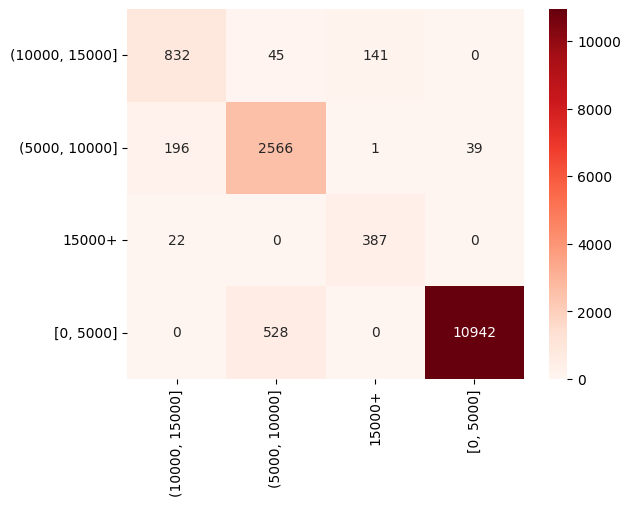

In [28]:
model_report(svc_pca_cv, X_test, y_test)

***

## Results:

In [29]:
model_names = ['svc', 'svc_cv', 'svc_pca_cv']

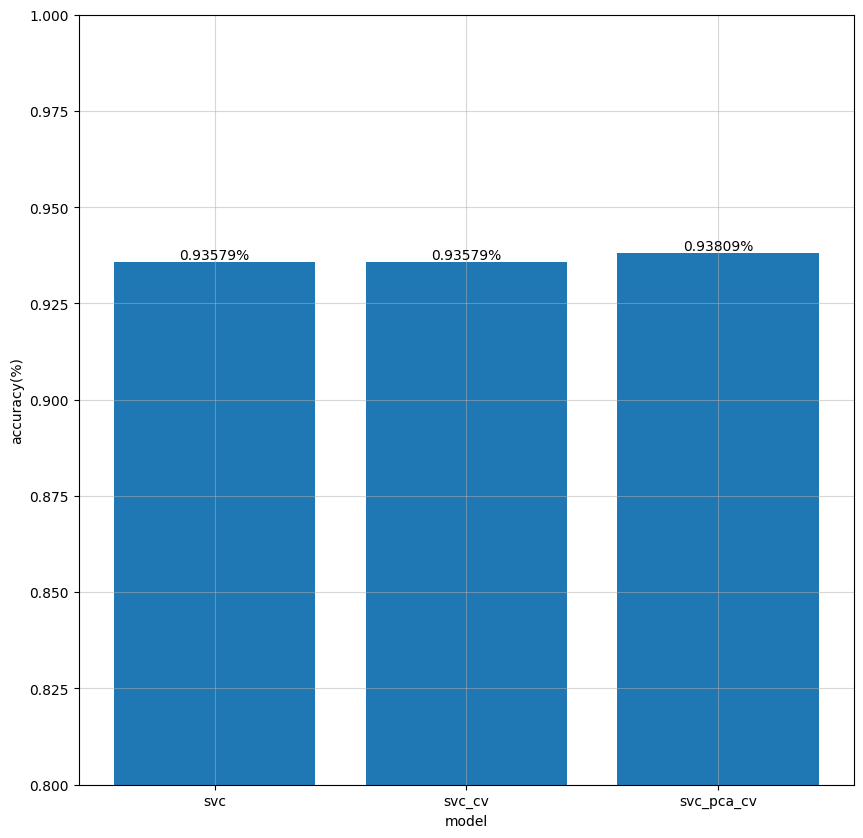

In [30]:
plt.figure(figsize=(10,10))
plt.bar(model_names, accuracy_scores)
plt.grid(alpha=0.5)
plt.ylim(0.8, 1.0)
for i, s in enumerate(accuracy_scores):
    plt.text(model_names[i], s, f'{s:.5f}%', ha='center', va='bottom')
plt.xlabel('model')
plt.ylabel('accuracy(%)')
plt.show()

Izabracemo **svc_pca_cv** kao predstavnika **SVC**

In [32]:
joblib.dump(svc_pca_cv, 'SVC.pkl')

['SVC.pkl']